In [ ]:
from google.colab import drive
import zipfile
import os

drive.mount('/content/drive')

zip_file_path = '/content/drive/MyDrive/animals.zip'
extracted_folder_path = '/content/animals/'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

print("Dataset extracted to:", extracted_folder_path)

Mounted at /content/drive
Dataset extracted to: /content/animals/


In [ ]:
import os
import numpy as np
from PIL import Image
from sklearn.preprocessing import LabelEncoder

animals_folder_path = '/content/animals/animals'

image_paths = []
labels = []

class_names = ['dog', 'cat', 'panda']

# Traverse the images in the 'animals' folder
for img_name in os.listdir(animals_folder_path):
    if img_name.endswith('.jpg') or img_name.endswith('.png'):
        # Identify the class based on the filename
        if 'dog' in img_name:
            label = 'dog'
        elif 'cat' in img_name:
            label = 'cat'
        elif 'panda' in img_name:
            label = 'panda'
        # Append the image path and label
        image_paths.append(os.path.join(animals_folder_path, img_name))
        labels.append(label)

# Convert labels to numerical format using LabelEncoder
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Load images, convert to grayscale, and resize to 32x32
images = []
for img_path in image_paths:
    img = Image.open(img_path).convert('L')  # Convert to grayscale
    img = img.resize((32, 32))  # Resize image to 32x32
    img_array = np.array(img)  # Convert to numpy array
    images.append(img_array)

# Convert list to numpy array for processing
X = np.array(images)
y = encoded_labels

print(f"Loaded {X.shape[0]} images with shape {X.shape[1:]}")


Loaded 3000 images with shape (32, 32)


Manhattan Accuracies: [np.float64(0.47733333333333333), np.float64(0.438), np.float64(0.4766666666666667), np.float64(0.4753333333333334), np.float64(0.48533333333333334), np.float64(0.4913333333333333), np.float64(0.4973333333333333), np.float64(0.48933333333333334), np.float64(0.492), np.float64(0.49866666666666665)]
Euclidean Accuracies: [np.float64(0.44266666666666665), np.float64(0.396), np.float64(0.43166666666666664), np.float64(0.42333333333333334), np.float64(0.4296666666666667), np.float64(0.43800000000000006), np.float64(0.44800000000000006), np.float64(0.445), np.float64(0.446), np.float64(0.446)]


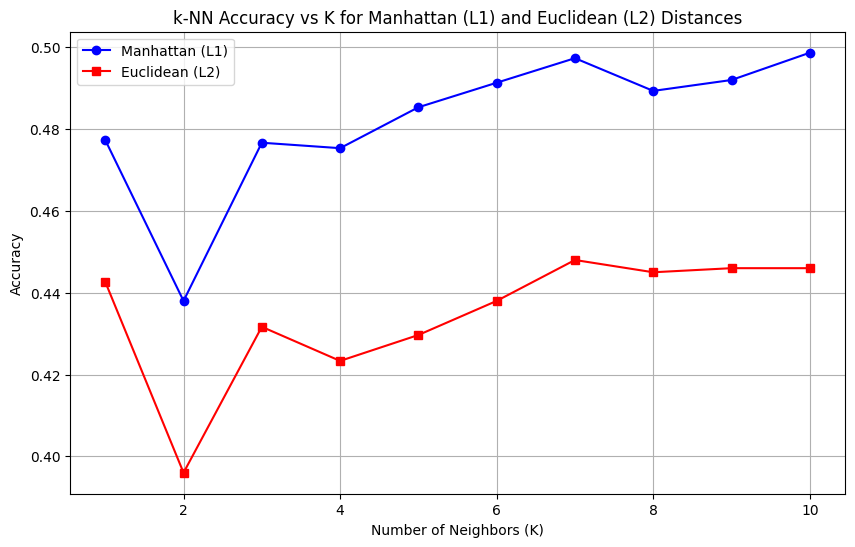

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Flatten images for k-NN
X_flat = X.reshape(X.shape[0], -1)

# Standardize the data (helps k-NN to perform better)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_flat)

# Define a function to compute the k-NN with different distance metrics
def knn_classifier(X, y, k, metric):
    model = KNeighborsClassifier(n_neighbors=k, metric=metric)
    return cross_val_score(model, X, y, cv=5, scoring='accuracy')  # 5-fold cross-validation

# Evaluate for different values of K
k_values = range(1, 11)  # Example k values: 1 to 10
manhattan_accuracies = []
euclidean_accuracies = []

# Loop through different values of K and compute accuracy for both metrics
for k in k_values:
    # Manhattan (L1) distance
    manhattan_score = knn_classifier(X_scaled, y, k, 'manhattan')
    # Euclidean (L2) distance
    euclidean_score = knn_classifier(X_scaled, y, k, 'euclidean')

    # Store the mean of cross-validation scores for both metrics
    manhattan_accuracies.append(manhattan_score.mean())
    euclidean_accuracies.append(euclidean_score.mean())

# Print the results
print("Manhattan Accuracies:", manhattan_accuracies)
print("Euclidean Accuracies:", euclidean_accuracies)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, manhattan_accuracies, label='Manhattan (L1)', marker='o', color='b')
plt.plot(k_values, euclidean_accuracies, label='Euclidean (L2)', marker='s', color='r')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.title('k-NN Accuracy vs K for Manhattan (L1) and Euclidean (L2) Distances')
plt.legend()
plt.grid(True)
plt.show()


**Discussion on k-NN Performance with Manhattan (L1) and Euclidean (L2) Distances**

Comparing the performance of the Manhattan (L1) and Euclidean (L2) distance metrics for classifying grayscale images of dogs, cats, and pandas using the k-NN algorithm. The comparison is based on the average accuracy values obtained from the 5-fold cross-validation. Below are the key insights from the evaluation:

1.Performance Comparison
Manhattan Distance (L1) Accuracies:
The accuracies for Manhattan distance show relatively higher values compared to the Euclidean distances across most values of K. The accuracy increases as K increases, reaching its peak at K = 10, where the average accuracy is approximately 49.87%. The accuracies increase as K progresses, but there is not much fluctuation after K = 5, indicating a trend toward more stable results with a higher number of neighbors.

2.Euclidean Distance (L2) Accuracies:
The accuracies for Euclidean distance are generally lower and show less variation. The accuracy for Euclidean distance starts at 39.6% and slowly increases to about 44.6%. The range of accuracy for Euclidean distance is from 39.6% (at K=2) to 44.6% (at K=10). The performance seems to similar after K = 5, with little improvement as the number of neighbors increases.

Limitations:

Resolution: The low resolution (32x32) of the images means that there is limited information available for the model to differentiate between classes.

Overfitting: With larger values of K, the model might start overfitting to the noise in the data. While increasing K reduces variance, it can also lead to a higher bias.

Potential Improvements:

Image Augmentation: To improve classification accuracy, especially with small datasets, techniques like image augmentation (rotations, flips, and translations) could be applied. This would help the model generalize better and improve its robustness to variations in the images.

Higher Resolution: Increasing the resolution of the images would provide more detailed information for the k-NN classifier to work with. This could lead to better performance for both distance metrics.

Conclusion:
Based on the results from the 5-fold cross-validation, Manhattan Distance (L1) generally outperforms Euclidean Distance (L2) for classifying grayscale images of dogs, cats, and pandas. The Manhattan distance tends to be more robust, particularly for this simple grayscale dataset, as it is less sensitive to small pixel value differences compared to Euclidean distance.

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"Training data: {X_train.shape[0]} samples, Testing data: {X_test.shape[0]} samples")


Training data: 2400 samples, Testing data: 600 samples


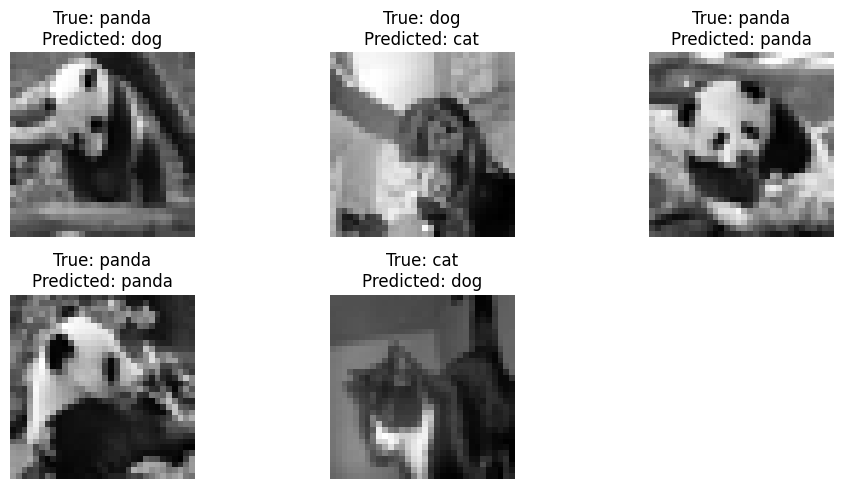

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

#The best k based on previous results
best_k = 10
knn_model = KNeighborsClassifier(n_neighbors=best_k, metric='manhattan')

# Training the model on the training data
knn_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_model.predict(X_test)

# Get the top 5 predictions (i.e., the first 5 images in the test set)
top_5_predictions = y_pred[:5]
top_5_true_labels = y_test[:5]

#function to display images with predictions
def display_predictions(images, true_labels, predicted_labels, label_encoder):
    plt.figure(figsize=(10, 5))

    # Loop over the first 5 test images
    for i in range(5):
        plt.subplot(2, 3, i + 1)

        # Display the image
        img = images[i].reshape(32, 32)  # Reshape to original 32x32 format for display
        plt.imshow(img, cmap='gray')
        plt.axis('off')

        # Display the true and predicted labels
        true_label = label_encoder.inverse_transform([true_labels[i]])[0]
        predicted_label = label_encoder.inverse_transform([predicted_labels[i]])[0]

        plt.title(f"True: {true_label}\nPredicted: {predicted_label}")

    plt.tight_layout()
    plt.show()

# Display the first 5 images with their predictions
display_predictions(X_test[:5], top_5_true_labels, top_5_predictions, label_encoder)